In [51]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
from tensorflow.keras.datasets import mnist

In [53]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [54]:
import numpy as np
import pandas as pd



In [55]:
single_image = x_train[0]

In [56]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

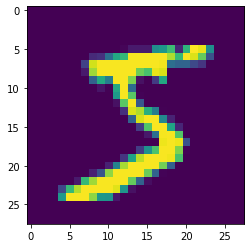

In [57]:
plt.imshow(single_image)

In [58]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [59]:
from tensorflow.keras.utils import to_categorical

In [60]:
y_train.shape

(60000,)

In [61]:
y_cat_train = to_categorical(y_train)

In [62]:
y_cat_test = to_categorical(y_test)

In [63]:
single_image.max()

255

In [64]:
single_image.min()

0

In [65]:
x_train = x_train/255

In [66]:
x_test = x_test/255

In [67]:
scaled_image = x_train[0]

In [68]:
scaled_image.max()

1.0

In [69]:
x_train.shape

(60000, 28, 28)

In [70]:
# batch size, width, height, color_channels
x_train = x_train.reshape(60000, 28, 28, 1)

In [71]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [72]:
x_train.shape

(60000, 28, 28, 1)

In [73]:
from tensorflow.keras.models import Sequential

In [74]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [75]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

# output layer softmax --> MULTI CLASS
model.add(Dense(10,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [76]:
from tensorflow.keras.callbacks import EarlyStopping

In [77]:
early_stop = EarlyStopping(monitor ='val_loss',patience=1)

In [78]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),
         callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1402 - accuracy: 0.9585 - val_loss: 0.0493 - val_accuracy: 0.9838
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0484 - accuracy: 0.9850 - val_loss: 0.0370 - val_accuracy: 0.9873
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0304 - accuracy: 0.9906 - val_loss: 0.0422 - val_accuracy: 0.9864


In [79]:
metrics = pd.DataFrame(model.history.history)

In [80]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.140215,0.958467,0.049289,0.9838
1,0.048418,0.984967,0.037003,0.9873
2,0.030386,0.990600,0.042166,0.9864


<AxesSubplot:>

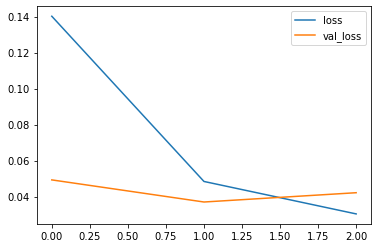

In [81]:
metrics[["loss","val_loss"]].plot()

<AxesSubplot:>

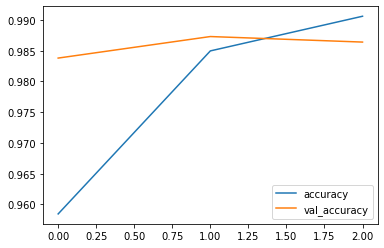

In [82]:
metrics[["accuracy","val_accuracy"]].plot()

In [83]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.04216615483164787, 0.9864000082015991]

In [84]:
from sklearn.metrics import classification_report,confusion_matrix

In [85]:
predictions = model.predict_classes(x_test)

In [86]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [87]:
confusion_matrix(y_test,predictions)

array([[ 975,    0,    2,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1129,    2,    0,    0,    0,    1,    2,    1,    0],
       [   0,    0, 1021,    0,    1,    0,    0,    8,    2,    0],
       [   0,    0,    6,  992,    0,    1,    0,    6,    4,    1],
       [   0,    0,    1,    0,  975,    0,    1,    0,    0,    5],
       [   4,    0,    0,   10,    0,  866,    2,    0,    8,    2],
       [   6,    3,    1,    1,    4,    1,  936,    0,    6,    0],
       [   0,    0,    5,    0,    0,    0,    0, 1021,    1,    1],
       [   4,    0,    3,    1,    0,    0,    1,    3,  960,    2],
       [   0,    3,    1,    0,    4,    1,    0,    4,    7,  989]],
      dtype=int64)

In [88]:
import seaborn as sns

<AxesSubplot:>

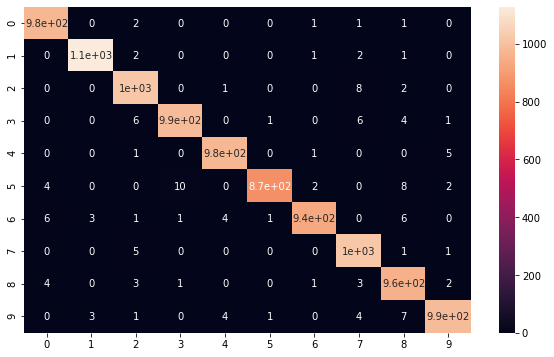

In [89]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [90]:
single_image = x_test[0]

In [91]:
single_image.shape

(28, 28, 1)

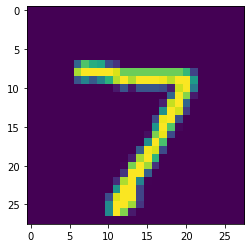

In [92]:
plt.imshow(single_image.reshape(28,28))

In [93]:
model.predict_classes(single_image.reshape(1,28,28,1))

array([7], dtype=int64)

In [94]:
model.save("My_MNIST_Modal.h5")